In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

コイルと直列に抵抗、並列にコンデンサが寄生素子として存在するような等価回路を考えた

In [3]:
def calc_Z(freq, L, C, R):
    omega = 2 * np.pi * freq
    
    
    Z_L = 1j * omega * L
    Z_R = R
    Z_C = 1 / (1j * omega * C)
    
    
    Z_total = 1 / (1 / (Z_L + Z_R) + 1 / Z_C)
    
    
    return Z_total

def calc_Z_real(freq,L,C,R):
    Z = calc_Z(freq,L,C,R)
    real_part = np.array(Z.real, dtype=np.float64) 
    return real_part
    
def calc_Z_imag(freq,L,C,R):
    Z = calc_Z(freq,L,C,R)
    imag_part = np.array(Z.imag, dtype=np.float64) 
    return imag_part

def linear(x,a,b):
    return a * x + b

VNAによってS11を計測した。ここからコイルのインピーダンスを逆算できる

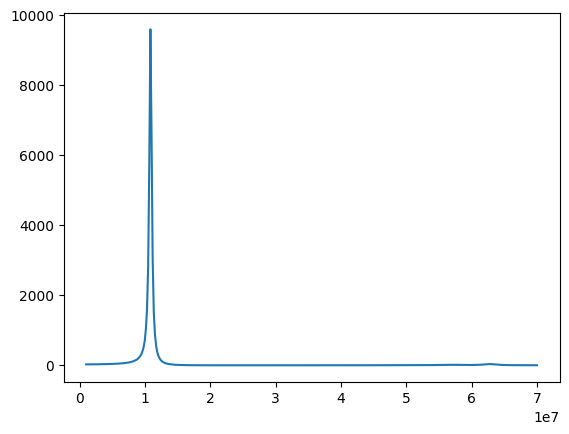

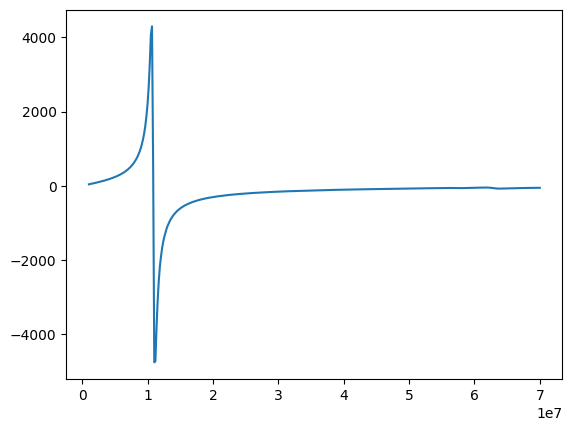

In [4]:
data = np.loadtxt("../data/coil_1-70MHz_2026_01_30.s1p",delimiter=" ")

Z_0 = 50

freq = data[:,0]
Z_data = (1 + data[:,1] + 1j * data[:,2])/(1 - data[:,1] - 1j * data[:,2]) * Z_0
Z_data_real = np.array(Z_data.real,dtype=np.float64)
Z_data_imag = np.array(Z_data.imag,dtype=np.float64)

plt.plot(freq,Z_data_real)
plt.figure()
plt.plot(freq,Z_data_imag)

周波数が小さいときは、インダクタンスの影響が支配的なので、インピーダンスの虚数部分は周波数に比例する。ここからインダクタンスの値を概算できる。

7.239590034580922e-06


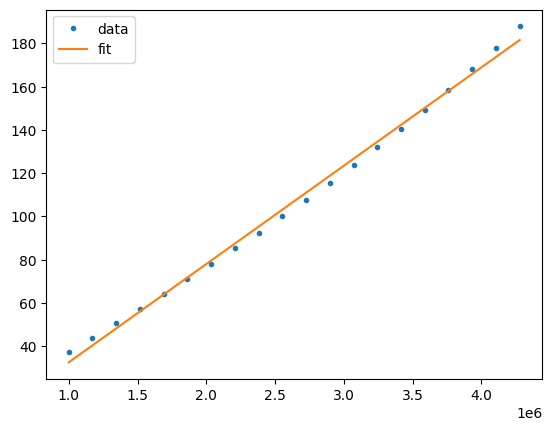

In [5]:
popt,pcov = curve_fit(linear,data[:20,0],Z_data_imag[:20])
print(popt[0]/(2 * np.pi))

plt.plot(freq[:20],Z_data_imag[:20],'.',label="data")
plt.plot(freq[:20],linear(freq,*popt)[:20],label="fit")
plt.legend()

フィッティングがうまくいかないので、手で頑張って調整した初期値を与える

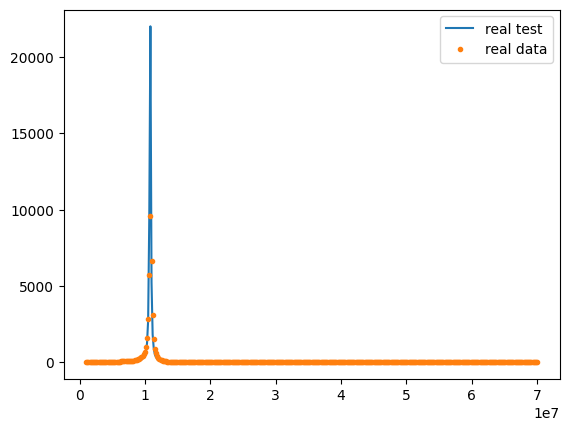

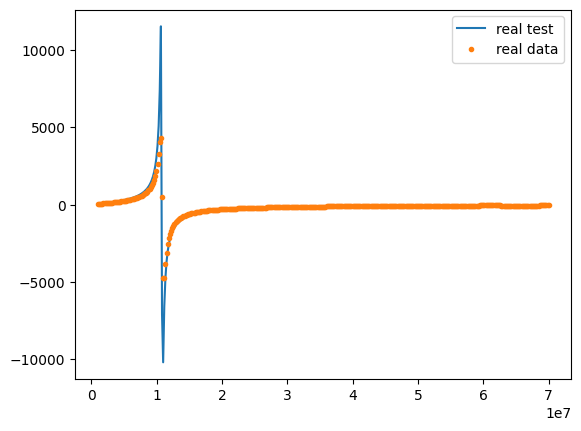

In [6]:
plt.plot(freq,calc_Z_real(freq,7.239590035174101e-06,30e-12,10),label='real test')
plt.plot(freq,Z_data_real,'.',label='real data')
plt.legend()

plt.figure()
plt.plot(freq,calc_Z_imag(freq,7.239590035174101e-06,30e-12,10),label='real test')
plt.plot(freq,Z_data_imag,'.',label='real data')
plt.legend()

うまくフィットできた

params fitted by real part [5.94980329e-06 3.61249292e-11 1.70590808e+01]
params fitted by imag part [5.91063404e-06 3.63741413e-11 1.70663341e+01]


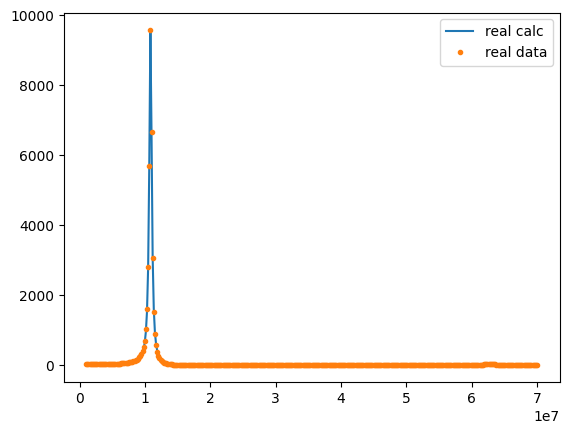

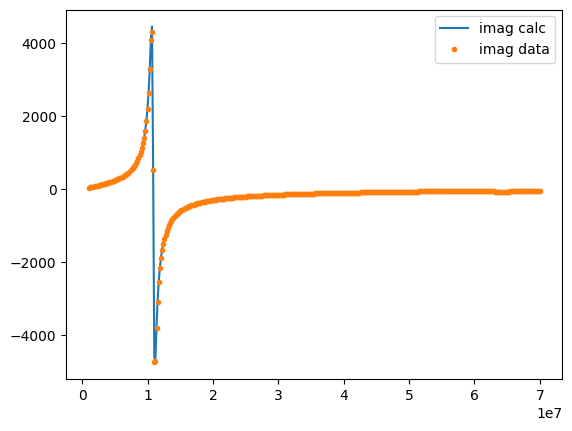

In [7]:
popt,pcov = curve_fit(calc_Z_real,freq,Z_data_real,p0=(7.239590035174101e-06,30e-12,10))
plt.plot(freq,calc_Z_real(freq,*popt),label='real calc')
plt.plot(freq,Z_data_real,'.',label='real data')
plt.legend()
print("params fitted by real part" , popt)

popt,pcov = curve_fit(calc_Z_imag,freq,Z_data_imag,p0=(7.239590035174101e-06,30e-12,10))
plt.figure()
plt.plot(freq,calc_Z_imag(freq,*popt),label='imag calc')
plt.plot(freq,Z_data_imag,'.',label='imag data')
plt.legend()
print("params fitted by imag part" , popt)

Deeとコイルを並列に接続した。寄生容量とDeeが並列に並ぶが、まとめて寄生容量とDeeの容量を合計した容量をもつコンデンサとみなせばよい

以下同様にフィッティングを行った

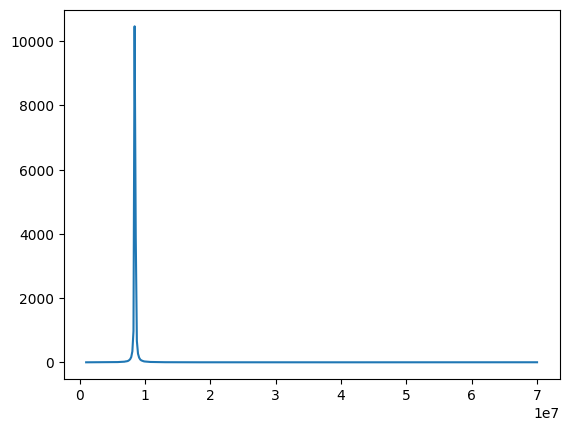

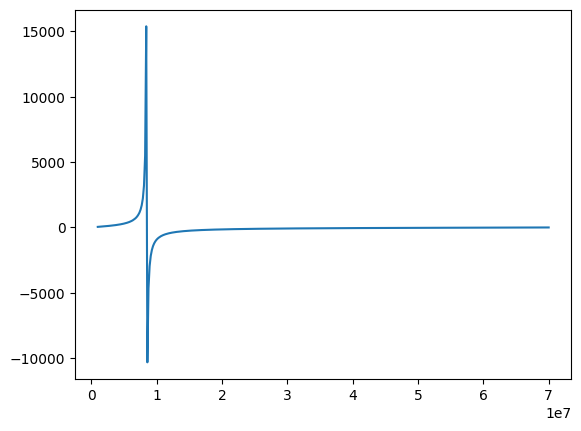

In [8]:
data = np.loadtxt("../data/coil+dee_1-70MHz_2026_01_30.s1p",delimiter=" ")

Z_0 = 50

freq = data[:,0]
Z_data = (1 + data[:,1] + 1j * data[:,2])/(1 - data[:,1] - 1j * data[:,2]) * Z_0
Z_data_real = np.array(Z_data.real,dtype=np.float64)
Z_data_imag = np.array(Z_data.imag,dtype=np.float64)

plt.plot(freq,Z_data_real)
plt.figure()
plt.plot(freq,Z_data_imag)

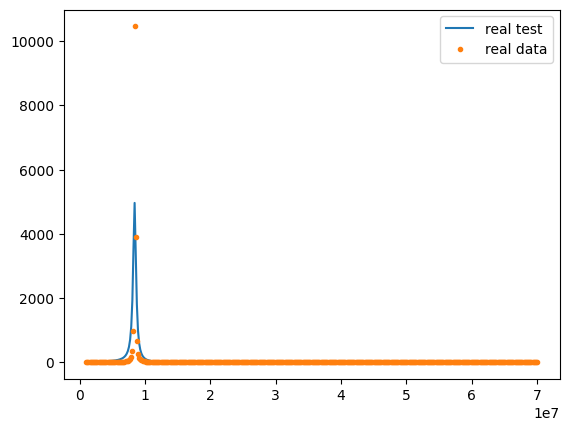

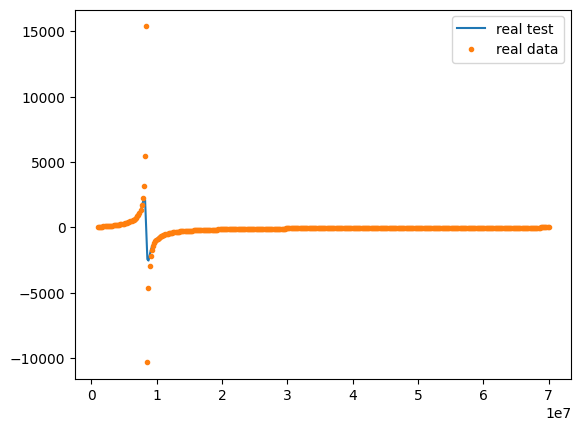

In [9]:
plt.plot(freq,calc_Z_real(freq,5.94980328e-06,6e-11,20),label='real test')
plt.plot(freq,Z_data_real,'.',label='real data')
plt.legend()

plt.figure()
plt.plot(freq,calc_Z_imag(freq,5.94980328e-06,6e-11,2e+01),label='real test')
plt.plot(freq,Z_data_imag,'.',label='real data')
plt.legend()

params fitted by real part [6.36457491e-06 5.53551030e-11 3.01919775e+00]
params fitted by imag part [5.86697728e-06 6.01110685e-11 2.95693680e+00]


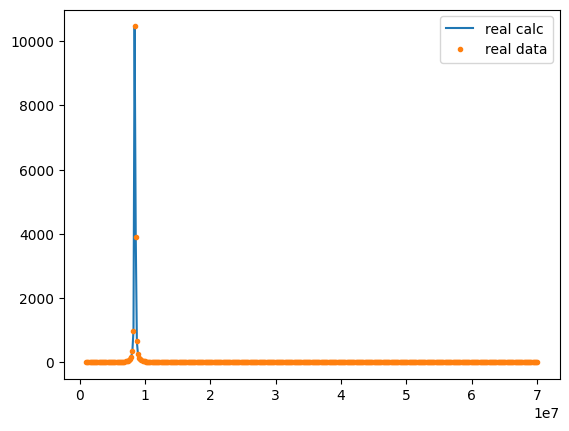

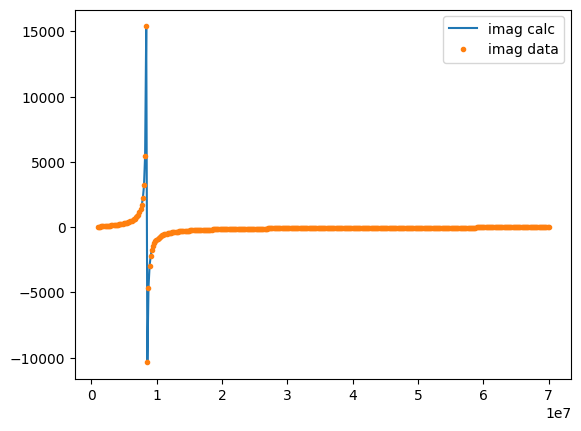

In [10]:
popt,pcov = curve_fit(calc_Z_real,freq,Z_data_real,p0=(5.94980328e-06,6e-11,20))
plt.plot(freq,calc_Z_real(freq,*popt),label='real calc')
plt.plot(freq,Z_data_real,'.',label='real data')
plt.legend()
print("params fitted by real part" , popt)

popt,pcov = curve_fit(calc_Z_imag,freq,Z_data_imag,p0=(5.94980328e-06,6e-11,20))
plt.figure()
plt.plot(freq,calc_Z_imag(freq,*popt),label='imag calc')
plt.plot(freq,Z_data_imag,'.',label='imag data')
plt.legend()
print("params fitted by imag part" , popt)

一般に実数部分が最大の周波数と、虚数部分が0の周波数は一致しない

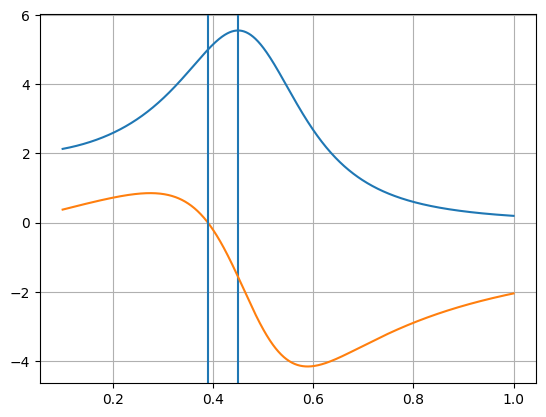

In [11]:
freq = np.linspace(0.1,1,1000)
L,C,R = 1 , 0.1 , 2
Z_real = calc_Z_real(freq,L,C,R)
plt.plot(freq,Z_real)
plt.axvline(np.sqrt(1/(C * L) - 1/2 * (R/L)**2)/(2 * np.pi))
Z_imag = calc_Z_imag(freq,L,C,R)
plt.plot(freq,Z_imag)
plt.axvline(np.sqrt(1/(C * L) - (R/L)**2)/(2 * np.pi))
plt.grid()

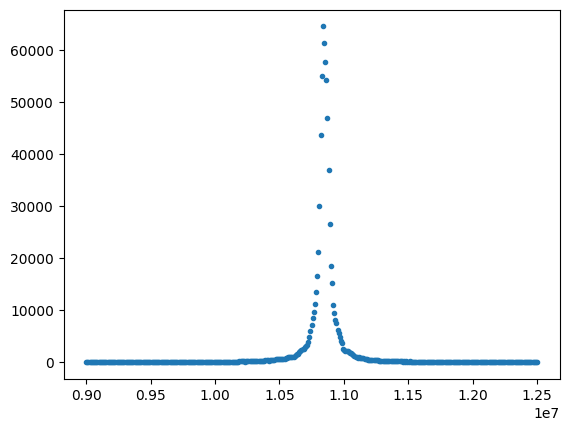

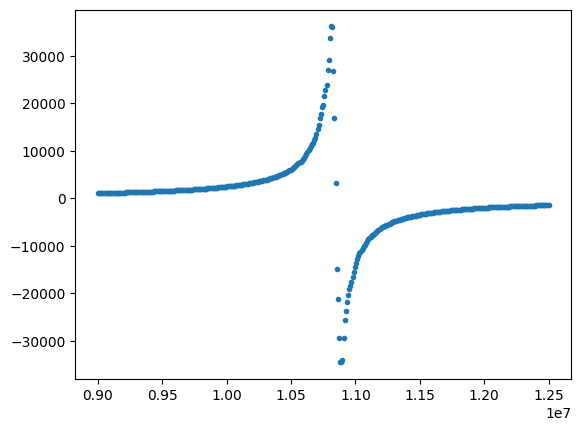

In [12]:
data = np.loadtxt("../data/coil_9-12.5MHz_2026_02_02.s1p",delimiter=" ")

Z_0 = 50

freq = data[:,0]
Z_data = (1 + data[:,1] + 1j * data[:,2])/(1 - data[:,1] - 1j * data[:,2]) * Z_0
Z_data_real = np.array(Z_data.real,dtype=np.float64)
Z_data_imag = np.array(Z_data.imag,dtype=np.float64)

plt.plot(freq,Z_data_real,'.')
plt.figure()
plt.plot(freq,Z_data_imag,'.')

params fitted by real part [6.10842429e-06 3.52426942e-11 2.63572434e+00]
pcov  3.3267383976290985e-08
params fitted by imag part [ 6.02552547e-06  3.57216899e-11 -2.54017883e+00]
pcov  2.5388473267314745e-08


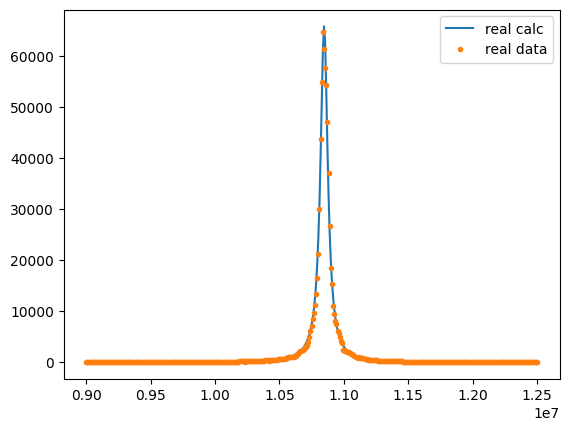

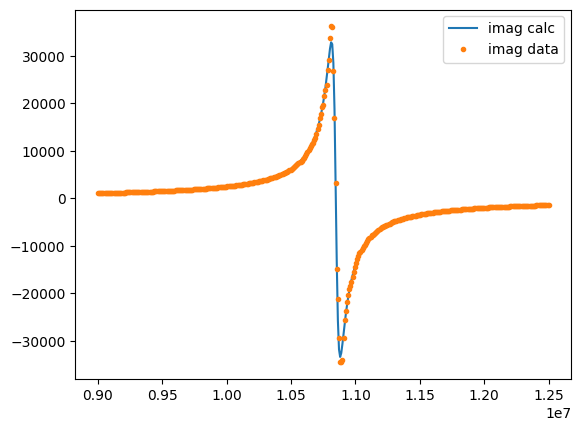

In [13]:
popt,pcov = curve_fit(calc_Z_real,freq,Z_data_real,p0=(5.94980328e-06, 3.61249293e-11, 1.70590808e+01))
plt.plot(freq,calc_Z_real(freq,*popt),label='real calc')
plt.plot(freq,Z_data_real,'.',label='real data')
plt.legend()
print("params fitted by real part" , popt)
print("pcov ",np.sqrt(pcov[0][0]))

popt,pcov = curve_fit(calc_Z_imag,freq,Z_data_imag,p0=(5.94980328e-06, 3.61249293e-11 ,1.70590808e+01))
plt.figure()
plt.plot(freq,calc_Z_imag(freq,*popt),label='imag calc')
plt.plot(freq,Z_data_imag,'.',label='imag data')
plt.legend()
print("params fitted by imag part" , popt)
print("pcov ",np.sqrt(pcov[0][0]))

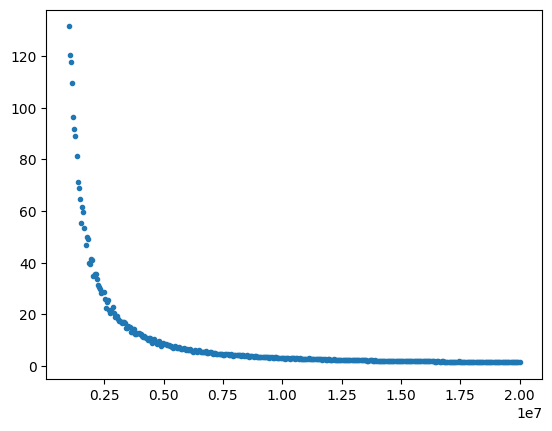

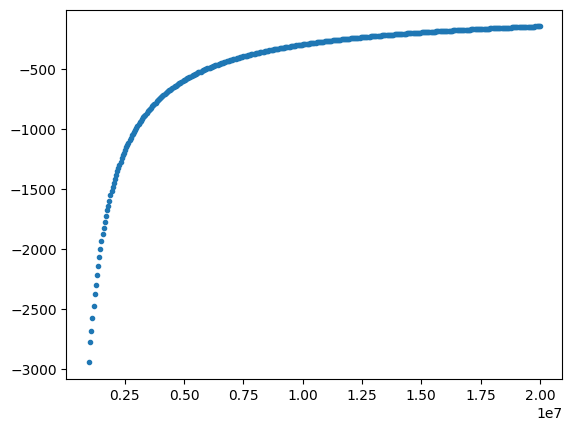

In [14]:
data = np.loadtxt('../data/dee_1-20MHz_2026_02_02.s1p')

Z_0 = 50


freq = data[:,0]
Z_data = (1 + data[:,1] + 1j * data[:,2])/(1 - data[:,1] - 1j * data[:,2]) * Z_0
Z_data_real = np.array(Z_data.real,dtype=np.float64)
Z_data_imag = np.array(Z_data.imag,dtype=np.float64)

plt.plot(freq,Z_data_real,'.')
plt.figure()
plt.plot(freq,Z_data_imag,'.')

params fitted by imag part [5.3912256e-11]
pcov  1.4016609690116071e-14


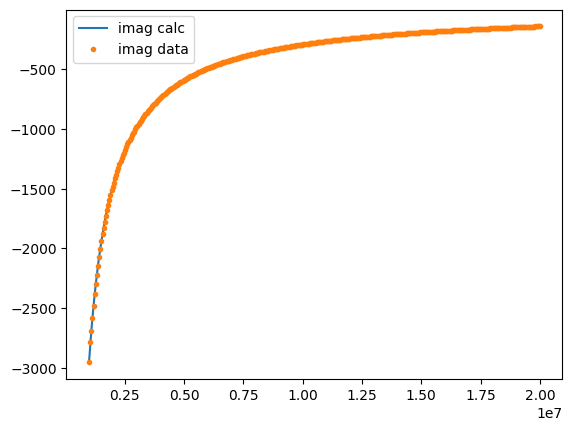

In [15]:
def calc_Z_C_imag(freq, C):
    return - 1 / (freq * 2 * np.pi * C)

popt,pcov = curve_fit(calc_Z_C_imag,freq,Z_data_imag,p0=(30e-12))
plt.figure()
plt.plot(freq,calc_Z_C_imag(freq,*popt),label='imag calc')
plt.plot(freq,Z_data_imag,'.',label='imag data')
plt.legend()
print("params fitted by imag part" , popt)
print("pcov ",np.sqrt(pcov[0][0]))

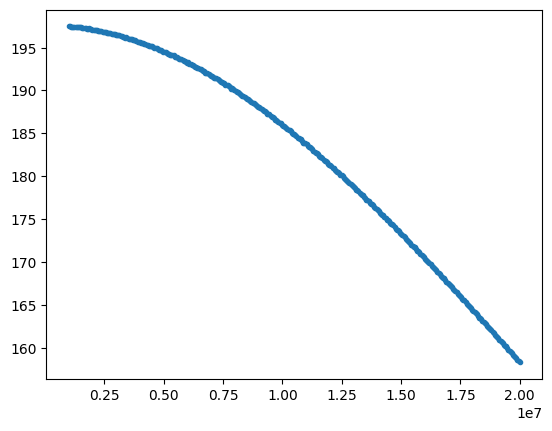

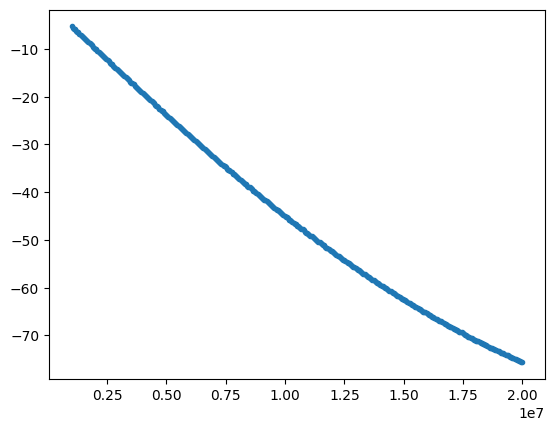

In [16]:
data = np.loadtxt('../data/jg_1-20MHz_2026_02_02.s1p')

Z_0 = 50


freq = data[:,0]
Z_data = (1 + data[:,1] + 1j * data[:,2])/(1 - data[:,1] - 1j * data[:,2]) * Z_0
Z_data_real = np.array(Z_data.real,dtype=np.float64)
Z_data_imag = np.array(Z_data.imag,dtype=np.float64)

plt.plot(freq,Z_data_real,'.')
plt.figure()
plt.plot(freq,Z_data_imag,'.')

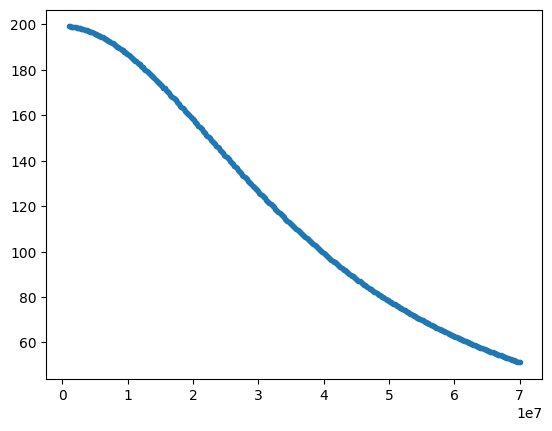

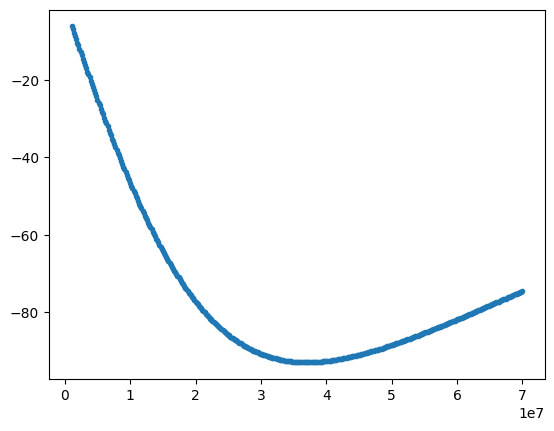

In [17]:
data = np.loadtxt('../data/jg_1-70MHz_2026_02_02.s1p')

Z_0 = 50


freq = data[:,0]
Z_data = (1 + data[:,1] + 1j * data[:,2])/(1 - data[:,1] - 1j * data[:,2]) * Z_0
Z_data_real = np.array(Z_data.real,dtype=np.float64)
Z_data_imag = np.array(Z_data.imag,dtype=np.float64)

plt.plot(freq,Z_data_real,'.')
plt.figure()
plt.plot(freq,Z_data_imag,'.')

params fitted by real part [1.99338196e-11 1.97971469e+02]
pcov  1.163023182855811e-14
params fitted by imag part [2.35369188e-11 1.84722534e+02]
pcov  2.0543135046568116e-14


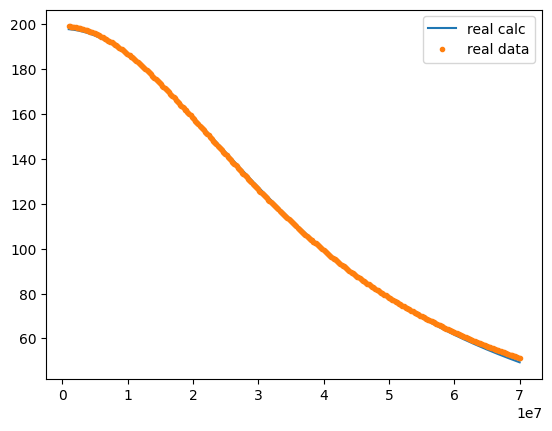

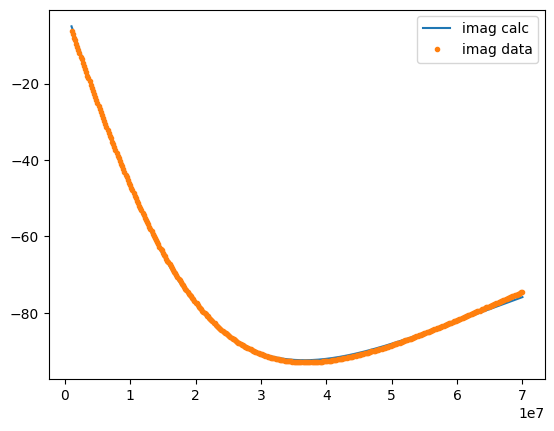

In [18]:
def calc_Z_CR_p(freq, C, R):
    omega = 2 * np.pi * freq
    
    
    Z_R = R
    Z_C = 1 / (1j * omega * C)
    
    
    Z_total = 1 / (1 / Z_R + 1 / Z_C)
    
    
    return Z_total

def calc_Z_CR_p_real(freq,C,R):
    Z = calc_Z_CR_p(freq,C,R)
    real_part = np.array(Z.real, dtype=np.float64) 
    return real_part
    
def calc_Z_CR_p_imag(freq,C,R):
    Z = calc_Z_CR_p(freq,C,R)
    imag_part = np.array(Z.imag, dtype=np.float64) 
    return imag_part

def linear(x,a,b):
    return a * x + b

popt,pcov = curve_fit(calc_Z_CR_p_real,freq,Z_data_real,p0=(2.35369188e-11 ,200))
plt.plot(freq,calc_Z_CR_p_real(freq,*popt),label='real calc')
plt.plot(freq,Z_data_real,'.',label='real data')
plt.legend()
print("params fitted by real part" , popt)
print("pcov ",np.sqrt(pcov[0][0]))

popt,pcov = curve_fit(calc_Z_CR_p_imag,freq,Z_data_imag,p0=(1e-12,200))
plt.figure()
plt.plot(freq,calc_Z_CR_p_imag(freq,*popt),label='imag calc')
plt.plot(freq,Z_data_imag,'.',label='imag data')
plt.legend()
print("params fitted by imag part" , popt)
print("pcov ",np.sqrt(pcov[0][0]))

params fitted by real part [6.16930586e-06 2.80023503e-11 8.83566071e+01]
params fitted by imag part [6.08542018e-06 2.83900598e-11 8.59124693e+01]


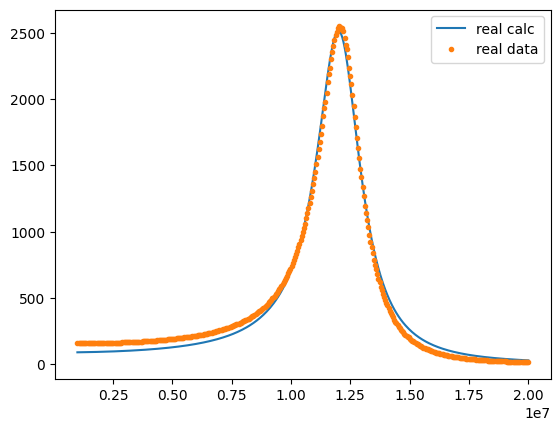

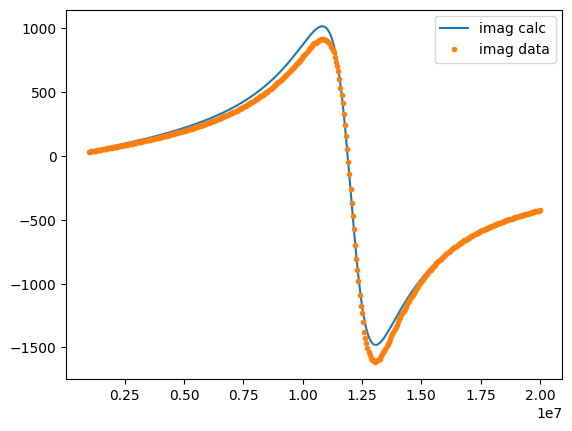

In [19]:
data = np.loadtxt("../data/coil+dee_1-20MHz_2026_02_02.s1p",delimiter=" ")

Z_0 = 50

freq = data[:,0]
Z_data = (1 + data[:,1] + 1j * data[:,2])/(1 - data[:,1] - 1j * data[:,2]) * Z_0
Z_data_real = np.array(Z_data.real,dtype=np.float64)
Z_data_imag = np.array(Z_data.imag,dtype=np.float64)


popt,pcov = curve_fit(calc_Z_real,freq,Z_data_real,p0=(6.16930562e-06 ,2.80023517e-11, 8.83565943e+01))
plt.plot(freq,calc_Z_real(freq,*popt),label='real calc')
plt.plot(freq,Z_data_real,'.',label='real data')
plt.legend()
print("params fitted by real part" , popt)

popt,pcov = curve_fit(calc_Z_imag,freq,Z_data_imag,p0=(6.16930562e-06 ,2.80023517e-11, 8.83565943e+01))
plt.figure()
plt.plot(freq,calc_Z_imag(freq,*popt),label='imag calc')
plt.plot(freq,Z_data_imag,'.',label='imag data')
plt.legend()
print("params fitted by imag part" , popt)

コイルをDeeと直列につないだ結果

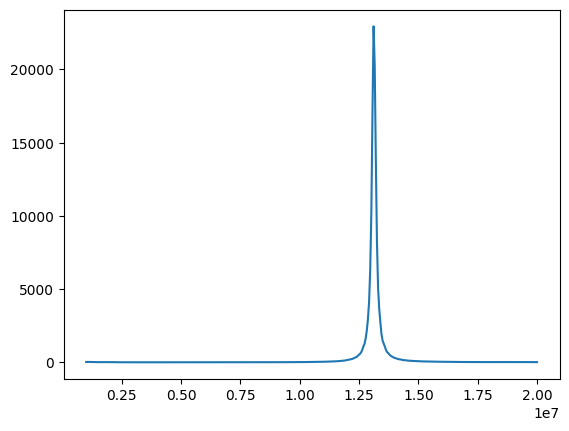

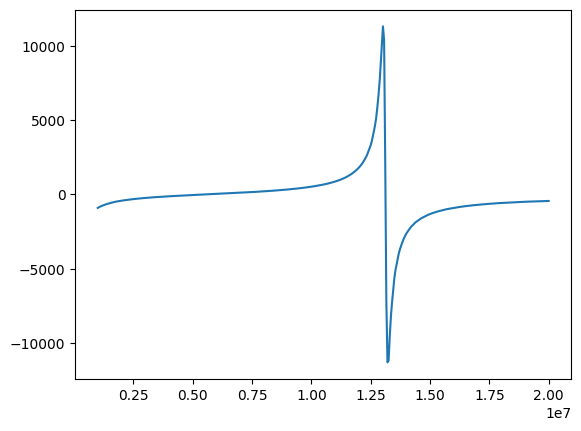

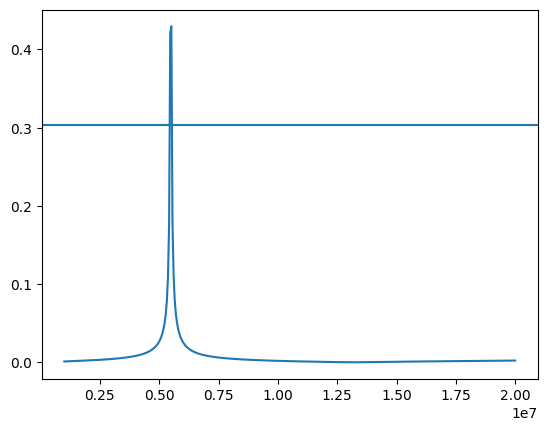

In [20]:
data = np.loadtxt("../data/coil+dee(serial)_1-20MHz_2026_02_04.s1p",delimiter=" ")

Z_0 = 50

freq = data[:,0]
Z_data = (1 + data[:,1] + 1j * data[:,2])/(1 - data[:,1] - 1j * data[:,2]) * Z_0
Z_data_real = np.array(Z_data.real,dtype=np.float64)
Z_data_imag = np.array(Z_data.imag,dtype=np.float64)

plt.plot(freq,Z_data_real)
plt.figure()
plt.plot(freq,Z_data_imag)
plt.figure()
amp = 1/np.abs(Z_data)
max = np.max(amp)
plt.plot(freq,amp)
plt.axhline(max / np.sqrt(2))

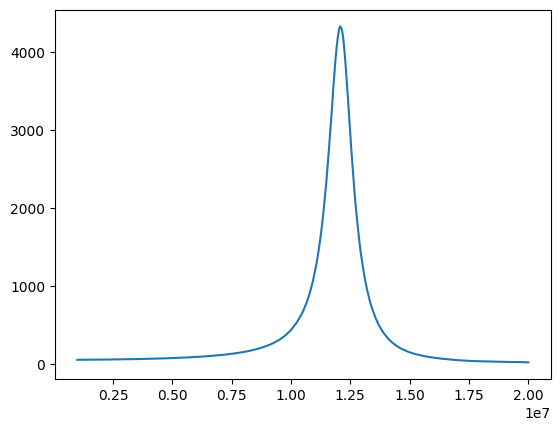

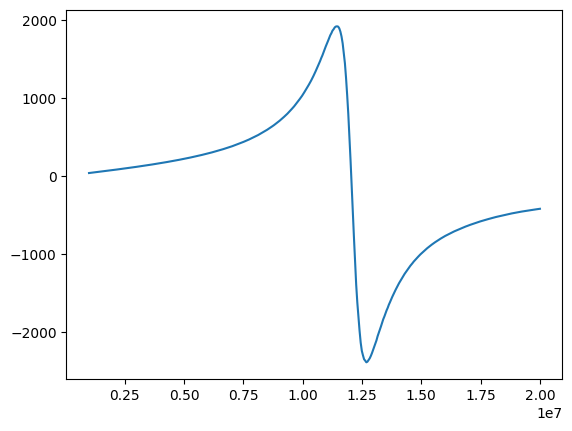

In [21]:
data = np.loadtxt("../data/coil+dee(serial)_dee_to_port2.s2p",delimiter=" ")

Z_0 = 50

freq = data[:,0]
Z_data = (1 + data[:,1] + 1j * data[:,2])/(1 - data[:,1] - 1j * data[:,2]) * Z_0
Z_data_real = np.array(Z_data.real,dtype=np.float64)
Z_data_imag = np.array(Z_data.imag,dtype=np.float64)

plt.plot(freq,Z_data_real)
plt.figure()
plt.plot(freq,Z_data_imag)

インピーダンスの絶対値とそのデシベル表示

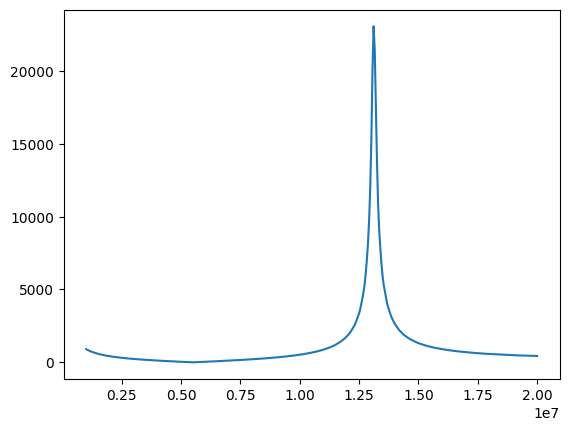

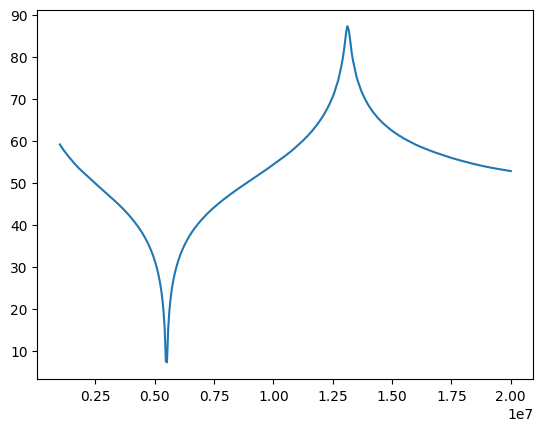

In [ ]:
Z_data_abs = np.sqrt(Z_data_real ** 2 + Z_data_imag ** 2)
Z_data_abs_db = 20 * np.log10(Z_data_abs)
# Z_im_inverse = 1 / 


plt.plot(freq,Z_data_abs)
plt.figure()
plt.plot(freq,Z_data_abs_db)


上記の結果を寄生インピーダンス込みのRLC直列回路としてfitする

params fitted by abs part [ 4.08338886e-06  1.70248562e-10 -5.20087196e-01  3.60169250e-11
  4.88879572e+00]


<Figure size 640x480 with 0 Axes>

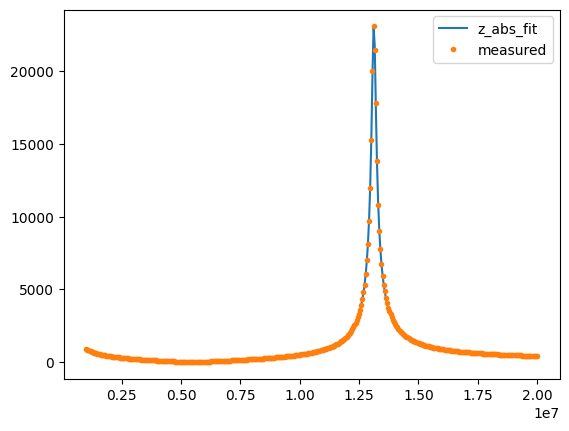

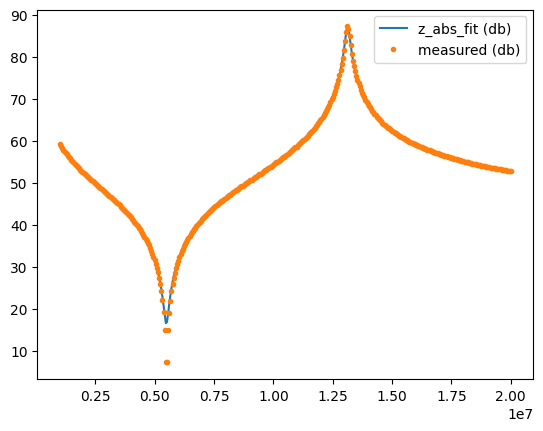

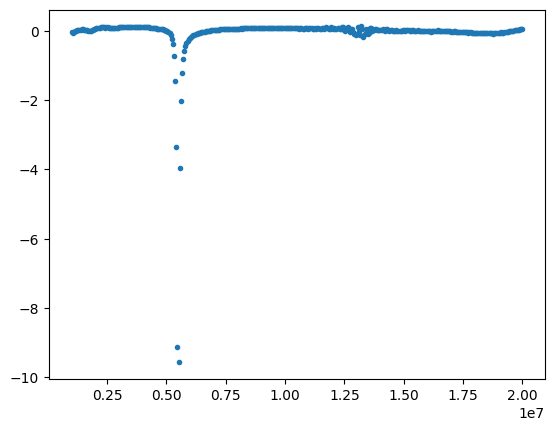

<Figure size 640x480 with 0 Axes>

In [22]:
def RLC_ser_with_stray(freq, L, C, R, C_2, R_2):
    omega = 2 * np.pi * freq
    Z_L = (1/(1j * omega * L + R_2) + 1j * omega * C_2)** (-1)
    Z_R = R
    Z_C = 1 / (1j * omega * C)
    return Z_L + Z_R + Z_C

def RLC_ser_with_stray_real(freq, L, C, R, C_2, R_2):
    Z = RLC_ser_with_stray(freq, L, C, R, C_2, R_2)
    real_part = np.array(Z.real, dtype=np.float64) 
    return real_part

def RLC_ser_with_stray_imag(freq, L, C, R, C_2, R_2):
    Z = RLC_ser_with_stray(freq, L, C, R, C_2, R_2)
    imag_part = np.array(Z.imag, dtype=np.float64) 
    return imag_part

def RLC_ser_with_stray_abs(freq, L, C, R, C_2, R_2):
    Z = RLC_ser_with_stray(freq, L, C, R, C_2, R_2)
    z_abs = np.array(abs(Z), dtype=np.float64) 
    return z_abs

popt,pcov = curve_fit(RLC_ser_with_stray_abs,freq,Z_data_abs,p0=(6.16930562e-06 ,12.80023517e-11, 20, 2.80023517e-11, 20))
plt.plot(freq,RLC_ser_with_stray_abs(freq,*popt),label='z_abs_fit')
plt.plot(freq,Z_data_abs,'.',label='measured')
plt.legend()
plt.figure()
print("params fitted by abs part" , popt)

Z_abs_fit_db = 20 * np.log10(RLC_ser_with_stray_abs(freq,*popt))
plt.plot(freq,Z_abs_fit_db,label='z_abs_fit (db)')
plt.plot(freq,20 * np.log10(Z_data_abs),'.',label='measured (db)')
plt.legend()
plt.figure()

#デシベルに関して残差を見る

zansa_abs_db = 20 * np.log10(Z_data_abs) - Z_abs_fit_db
plt.plot(freq,zansa_abs_db,'.',label='measured')
plt.figure()



(シミュレーション)コイルの寄生インピーダンスとして、直列にコイル、並列にコンデンサを考える。このときのグラフは適当な数値を代入すると以下のようになる。順に、インピーダンスの実部, 虚部, 絶対値, である。最後に絶対値のデシベル表示をのせた。デシベル表示になって見えたピークが共鳴のピークであり、リニアのときに見えているピークは寄生インピーダンス由来のもの

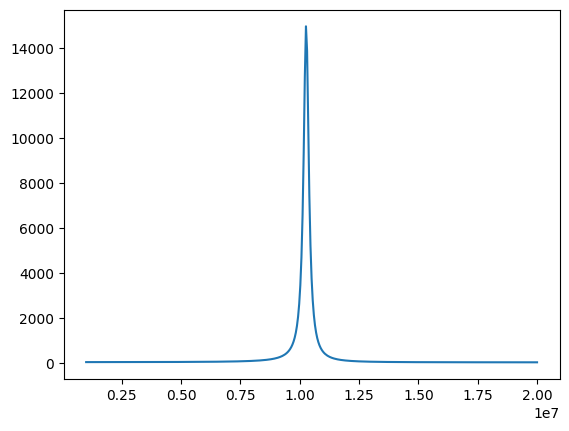

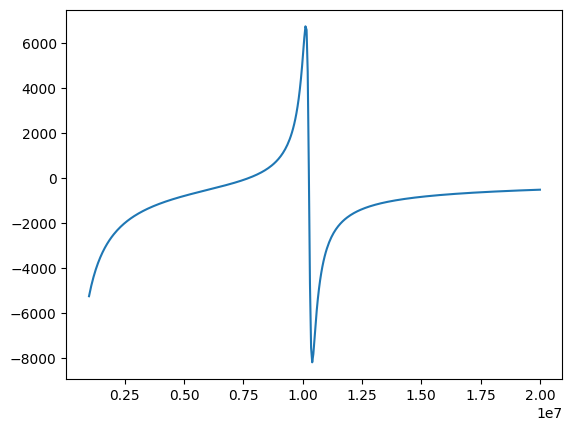

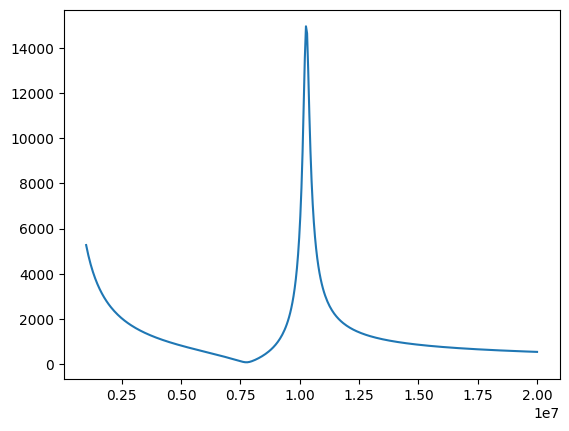

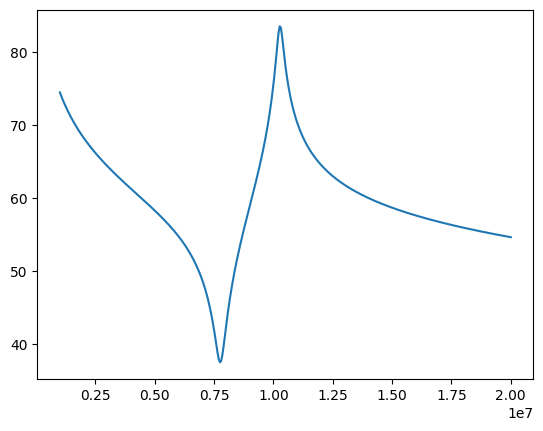

In [23]:
plt.plot(freq, RLC_ser_with_stray_real(freq, 6 * 10 **(-6), 30 * 10 ** (-12), 20, 40 * 10 ** (-12), 10))

plt.figure()
plt.plot(freq, RLC_ser_with_stray_imag(freq, 6 * 10 **(-6), 30 * 10 ** (-12), 20, 40 * 10 ** (-12), 10))
plt.figure()
plt.plot(freq, RLC_ser_with_stray_abs(freq, 6 * 10 **(-6), 30 * 10 ** (-12), 20, 40 * 10 ** (-12), 10))
plt.figure()
z_abs_db_example = 20 * np.log10(RLC_ser_with_stray_abs(freq, 6 * 10 **(-6), 30 * 10 ** (-12), 20, 40 * 10 ** (-12), 10))

plt.plot(freq, z_abs_db_example)

